![](./img/logo.png)

# Modelo **03**

### Descripción de Valores:

    Age: continuo.
    Bodymass: continuo.
    Height: continuo.
    Education: 11th, HS-grad, Assoc-acdm, Some-college, 10th, Prof-school, 7th-8th, 9th,
               12th, Bachelors, Masters, Doctorate, 5th-6th, Assoc-voc, 1st-4th, Preschool.
    Martial_Status: Never-married, Married-civ-spouse, Widowed, Divorced,
                    Separated, Married-spouse-absent, Married-AF-spouse.
    Occupation: Machine-op-inspct, Farming-fishing, Protective-serv, Other-service, Sales,
                Prof-specialty, Craft-repair, Adm-clerical, Exec-managerial, Armed-Forces,
                Tech-support,  Priv-house-serv, Transport-moving, Handlers-cleaners.
    Race: Black, White, Asian-Pac-Islander, Other, Amer-Indian-Eskimo.
    Sex: Male, Female.
    Hours_per_week: tiempo en horas.
    Country: United-States, Peru, Guatemala, Mexico, Dominican-Republic,
             Ireland, Germany, Philippines, Thailand, Haiti, El-Salvador,
             Puerto-Rico, Vietnam, South, Columbia, Japan, India, Laos,
             Cambodia, Poland, England, Cuba, Taiwan, Italy, Portugal,
             Canada, China, Nicaragua, Honduras, Iran, Yugoslavi, Greece,
             Scotland, Jamaica, Ecuador,  Hungary, Hong, Trinadad&Tobago,
             Outlying-US(Guam-USVI-etc), France.
    Target: <=50K, >50K.

## 0.- Bibliotecas y Lectura

In [ ]:
! git clone https://github.com/GodCarlosRojas/DATABASEHPC.git

fatal: destination path 'DATABASEHPC' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
# se carga el dataset en un objeto pandas "dataframe =df"
url = '/content/DATABASEHPC/indiceMasaCorporal.csv'
SF = df_bmi = pd.read_csv(url)
SF = df_bmi.head()


## 1.- Limpieza de los datos ( NaN)
    - Bonus: ¿Cuantas Filas se han eliminado después de la limpieza?

In [ ]:
#1.- Limpieza de valores NaN
#1.1.- Listar la cantidad de valores NaN por columna
df_bmi.isnull().sum()
len(df_bmi)

16282

**OBSERVACIONES PUNTO 1.1:**

En este caso se puede observar que las columnas "Education", "Martial_Status", "Race", "Sex", "Hours_per_week", "Target" poseeen 1 solo dato NaN. La columna "Occupation" tiene 967, y la columna "Country" tiene 275 datos NaN

In [ ]:
#1.2.- Eliminar los valores NaN del dataset
SF = df_bmi.dropna()
df_bmi.dropna()

,Age,Bodymass,Height,Education,Martial_Status,Occupation,Race,Sex,Hours_per_week,Country,Target
1,25,78.81,160.96,11th,Never-married,Machine-op-inspct,Black,Male,40.0,United-States,<=50K.
2,38,82.35,148.96,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50.0,United-States,<=50K.
3,28,46.30,149.62,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40.0,United-States,>50K.
4,44,107.85,146.28,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40.0,United-States,>50K.
6,34,46.77,170.55,10th,Never-married,Other-service,White,Male,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...
16276,33,63.77,140.15,Bachelors,Never-married,Prof-specialty,White,Male,40.0,United-States,<=50K.
16277,39,53.76,132.50,Bachelors,Divorced,Prof-specialty,White,Female,36.0,United-States,<=50K.
16279,38,82.94,168.96,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,50.0,United-States,<=50K.
16280,44,104.39,179.57,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40.0,United-States,<=50K.


**Observaciones PUTNO 1.2:**

Primero se cuenta cuantos valores tenia el Dataset, que en este caso eran 16282(aca incluyendo valores Nan), luego se procede a eliminar las filas con esos valores.


In [ ]:
#1.3.- ¿Con cuantos registros cuenta ahora el dataset?
len(SF)

15060

**Observaciones PUNTO 1.3: **

Al haber eliminado ya las filas con valores, queda un total de 15060 filas. Por lo que se puede decir que habian 1222 filas que ensuciaban la base de datos.

## 2.- Insertar columna que presente el Indice de Masa Corporal
[Enlace BMI](https://www.calculator.net/bmi-calculator.html)

 $BMI = kg/(m^2)$

<img src="./content/DATABASEHPC/graff003.png">

In [ ]:
#2.- Insertar columna de Indice Masa Corporal (enlace) después de la columna ‘Height’
SF.insert(3, "BMI", (SF['Bodymass'])/((SF['Height']/100)*(SF['Height']/100)), allow_duplicates=False)
print(SF)

      Age  Bodymass  Height        BMI      Education       Martial_Status  \
1      25     78.81  160.96  30.419033           11th        Never-married   
2      38     82.35  148.96  37.112847        HS-grad   Married-civ-spouse   
3      28     46.30  149.62  20.682436     Assoc-acdm   Married-civ-spouse   
4      44    107.85  146.28  50.402287   Some-college   Married-civ-spouse   
6      34     46.77  170.55  16.079181           10th        Never-married   
...    ..       ...     ...        ...            ...                  ...   
16276  33     63.77  140.15  32.466107      Bachelors        Never-married   
16277  39     53.76  132.50  30.621574      Bachelors             Divorced   
16279  38     82.94  168.96  29.053351      Bachelors   Married-civ-spouse   
16280  44    104.39  179.57  32.373625      Bachelors             Divorced   
16281  35     47.25  180.60  14.486595      Bachelors   Married-civ-spouse   

               Occupation                 Race      Sex  Hours_

**Observaciones PUNTO 2:**

Se inserto la columna con el calculo de BMI de cada sujeto

## 3.- ¿Cuantos hombres y mujeres presentan BMI normal?

    *------------------*------------*
    |   Categoría      |  Rango BMI |
    *------------------*------------*
    | Delgadez severa  |    < 16    |
    | Delgadez moderada|  16 - 17   |
    | Delgadez leve    |  17 - 18,5 |
    | Normal           |  18.5 - 25 |
    | Sobrepeso        |  25 - 30   |
    | Obesos Clase I   |  30 - 35   |
    | Obesos Clase II  |  35 - 40   |
    | Obesos Clase III |    > 40    |
    *------------------*------------*

In [ ]:
#3.- ¿Cuántos hombres y mujeres presentan BMI normal?
BMINORMAL = SF.query('BMI >= 18.5  and BMI <=24.9')
len(BMINORMAL)

3110

**Observaciones PUNTO 3:**

Se puede observar que entre hombres y mujeres, 3110 de ellos tiene un BMI normal, lo que representa un 20,65% de la poblacion tienen su BMI entre 18.5 y 24,9. Por lo que se puede decir que 11950 personas no tienen un BMI normal

## 4.- ¿Cuántos hombres y mujeres presentan BMI Obesos Clase III?

In [ ]:
#4.- ¿Cuántos hombres y mujeres presentan BMI Obesos Clase III?
BMICLASE3 = SF.query('BMI >= 40')
len(BMICLASE3)

3279

**Observaciones PUNTO 4:**

Se puede observar que entre hombres y mujeres, 3279 de ellos presentan obesidad clase 3(alto riesgo), lo que representa que el 21,77% de la poblacio  tiene un BMI mayor a 40. Entonces se dedce que en esta polbacion hay mas personas con BMI CLASE 3 que con uno normal

In [ ]:
SF['Age'] = SF['Age'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 5.-  ¿Cuál es la edad promedio de las mujeres en el dataset?

In [ ]:
#5.- ¿Cuál es la edad promedio de las mujeres en el dataset?
mujeres = SF[SF['Sex'] == ' Female']
mean_edad = mujeres['Age'].sum()/len(mujeres)
print(mean_edad)

37.18644412782414


**Observaciones PUNTO 5:**

Primero se convirtio Age que estaba tipo Object a float, esto para poder operarlo y conseguir el promedio, luego se separaron las mujeres de la lista en otra auxiliar, para luego promediar sus edades, y se concluye que la edad promedio de mujeres del Dataset es de 37 años

## 6.-  ¿Es verdad que las personas del DataFrame del pais ' United-States', en promedio se encuentran en 'Sobre Peso'?
      - Bonus -->  ¿En que categoria 'BMI' se encuentran en promedio por 'Sex' las personas del DataFrame?
     
    
    *------------------*------------*
    |   Categoría      |  Rango BMI |
    *------------------*------------*
    | Delgadez severa  |    < 16    |
    | Delgadez moderada|  16 - 17   |
    | Delgadez leve    |  17 - 18,5 |
    | Normal           |  18.5 - 25 |
    | Sobrepeso        |  25 - 30   |
    | Obesos Clase I   |  30 - 35   |
    | Obesos Clase II  |  35 - 40   |
    | Obesos Clase III |    > 40    |
    *------------------*------------*

In [ ]:
#6.- ¿Es verdad que las personas del dataset del país ' United-States', en promedio se encuentran en 'Sobre Peso’?
EEUU = SF[SF['Country'] == ' United-States']
mean_bmi = EEUU['BMI'].mean()
print(mean_bmi)

31.666798666463507


**Observaciones PUNTO 6:**

Se ponen los datos que tengan UnitedStates enuna lista auxiliar para asi poder promediar su BMI.
Se concluye que es verdad que United States se encuentra en la categoria de sobre pesoclase 1, con un BMI promedio de 31,66

##7.- ¿Cuál es el promedio de la masa corporal del país ‘Colombia’?
#8.- ¿Cuál es la categoría BMI que presenta el país ‘Colombia’ en promedio?

In [ ]:
COLOM = SF[SF['Country'] == ' Colombia']
mean_bmicol = COLOM['BMI'].mean()
print(mean_bmicol)

nan


**Observaciones PUNTO 7 y 8:**

No se sabe cual es el BMI promedio de Colombia, esto ya que Colombia no hace parte de la poblacion de esta base de datos. Entonces tampoco se sabe que categoria de BMI tiene.

## 9.- Calcule el promedio y la desviación estandar de la edad, en las siguentes categorias ['BMI']:
        - La edad promedio y su desviación de categoría Delgadez Severa: {mean} +- {std} años.
        - La edad promedio y su desviación de categoría Obesos Clase II: {mean} +- {std} años.
        - La edad promedio y su desviación de categoría Obesos Clase III: {mean} +- {std} años.

In [ ]:
#9.- Calcule el promedio y la desviación estándar de la edad, en las siguientes
#categorías [‘BMI']:
#- Delgadez Severa: {mean} +- {std} años.
#- Obesos Clase II: {mean} +- {std} años.
#- Obesos Clase III: {mean} +- {std} años.

BMIDS = SF.query('BMI < 16')
mean_ds=BMIDS['BMI'].mean()
std_ds=BMIDS['BMI'].std()
print("- Delgadez Severa: ",mean_ds," +- ",std_ds," años.")
BMIC2 = SF.query('BMI >= 35 and BMI <= 39.9')
mean_c2=BMIC2['BMI'].mean()
std_c2=BMIC2['BMI'].std()
print("- Obesidad clase 2: ",mean_c2," +- ",std_c2," años.")
BMIC3 = SF.query('BMI >= 40')
mean_c3=BMIC3['BMI'].mean()
std_c3=BMIC3['BMI'].std()
print("- Obesidad clase 3: ",mean_c3," +- ",std_c3," años.")


- Delgadez Severa:  14.624393228180535  +-  0.9281017249707174  años.
- Obesidad clase 2:  37.285241806673525  +-  1.4270824652694711  años.
- Obesidad clase 3:  47.91942532394651  +-  5.932066956521273  años.


**Observaciones PUNTO 9:**

De lo anterior se puede observar:

-Delgadez severa tiene el promedio y desvacion estandar mas bajos en sus sujetos.

-Obesidad clase 3 tiene el mayor promedio y desviacion estandar en la edad de los sujetos


## 10.- De las personas de más edad en el Dataframe:
    - ¿Cuantas mujeres aparecen, que grado de educación y que estado civil tienen?
    - ¿Es cierto que son todas del pais 'United-States'?

In [ ]:
SF['Age'].max()

90.0

**Observaciones PUNTO 10:**

La edad maxima de la base de datos es 90 años

In [ ]:
#10.1.- ¿Cuántas mujeres aparecen, que grado de educación y que estado civil tienen?
agemax = SF.query('Age == 90')
mujmax = agemax[agemax['Sex'] == ' Female']
pnt101= mujmax[['Education','Martial_Status']].copy()
print(len(mujmax))
print(pnt101)

2
           Education  Martial_Status
12447   Some-college   Never-married
15089        HS-grad   Never-married


**Observaciones PUNTO 10.1:**

Se puede obervar que solo hay 2 mujeres con 90 años(la edad maxima), una de ellas tiene el  de egrado de educacion de Some-college y nunca se caso, y la ota tiene el grado de estudio de Hs-grad y nunca se caso.

In [ ]:
#10.2.- ¿Es cierto que son todas del país 'United-States'?
mujcou = mujmax[mujmax['Country'] == ' United-States']
print(len(mujcou))
print(mujcou)

2
        Age  Bodymass  Height        BMI      Education  Martial_Status  \
12447  90.0     79.58  142.02  39.455261   Some-college   Never-married   
15089  90.0     90.11  188.57  25.341236        HS-grad   Never-married   

          Occupation    Race      Sex  Hours_per_week         Country   Target  
12447   Adm-clerical   White   Female            12.0   United-States   <=50K.  
15089   Adm-clerical   White   Female            40.0   United-States    >50K.  


**Obervaciones punto 10.2:**

Si es cierto que ambas mujeres con 90 años son de United-States

## 11.- Presentar la gráfica de Edad por Ocupación por Género
    --> BONUS: Mencione al menos 3 (tres) observaciones obtenidas de la gráfica

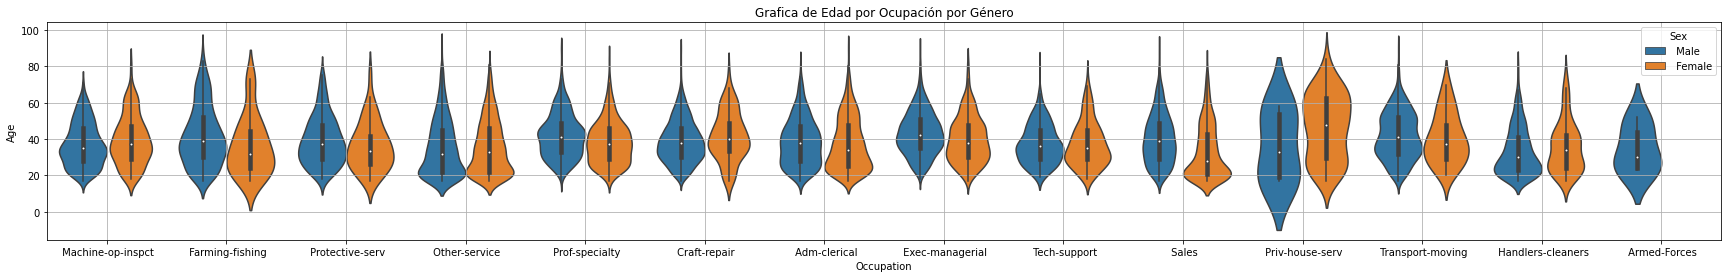

In [ ]:
#11.- Presentar la gráfica de Edad por Ocupación por Género
plt.figure(figsize=(30,4))
sns.violinplot(data = SF,  x = 'Occupation', y = 'Age', hue='Sex')

plt.title('Grafica de Edad por Ocupación por Género')
plt.grid()

**Observaciones PUNTO 11:**

Grfica de violin para representar Edad por Ocupacionn por Genero.
Se elijio la grafia en violin debido a que hay varias ocupaciones, y las edades en cada una de ellas es diferente, por lo cual un diagrama de barras no es buena opcion para representar esto, ya que es una poblacion muy grande, por lo que no se evidenciaria claramente los datos del Data set, por lo que hacer una analissis asi seria mas complejo, de hay que sea mejor la figura de violin para representar esto

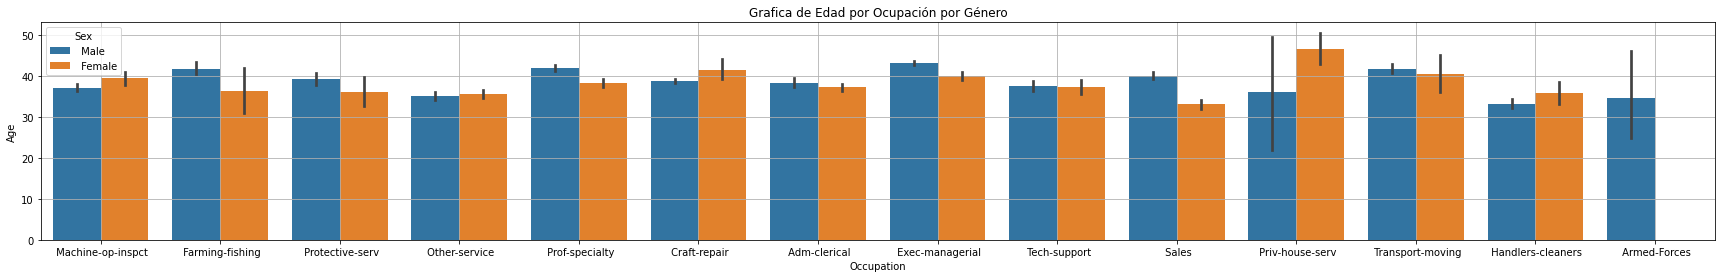

In [ ]:
#11.1- Presentar la gráfica de Edad por Ocupación por Género
plt.figure(figsize=(30,4))
sns.barplot(data = SF,  x = 'Occupation', y = 'Age', hue='Sex')
plt.title('Grafica de Edad por Ocupación por Género')
plt.grid()

Esta era la grafica solicitado para resolver el ejercicio, pero como ya se menciono la grafica de violin es mas optima para presentar los resultados.

El diagrama de barras presenta la comparativa Edad por ocupacion entre hombres y mujeres. La linea negra representa el rango la desviacion de los datos

##12.- Describa al menos 5 conclusiones sobre la gráfica del punto 11.

1. priv-house-serv tiene la mayor densidad de hombres y mujeres trabajando en eso

2. Armed-forces posee solo hombres, que tiene su promedio muy cerca a su mediana, que aproximadamente serian 30 años

3. El promedio de edad mas bajo para que los hombres trabajan es en Sales, con uno de masomenos 23 años

4. El promedio de edad mas bajo para que las mujeres trabajan es other service , con uno de masomenos 23 años

5. La ocupacion con menos densidad poblacional es Sales

## 13.-  ¿Es cierto que las personas que reciben más de 50k ['Target'] tienen al menos educación secundaria?
        educación = Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate

In [ ]:
#13.- ¿Es cierto que las personas que reciben más de 50k ['Target'] tienen al menos educación secundaria?
edu= SF.query('Education == " 11th" or Education == " 10th" or Education == " 7th-8th" or Education == " 9th" or Education == " 12th" or Education == " 5th-6th" or Education == " 1st-4th"')
sal = edu[edu['Target'] == ' >50K.']
print(len(sal))

112


**Observaciones PUNTO 13:**

No es cierto, para ganar mas de 50k de salario no necesariamente debe haber terminado la educacion secundaria, ya que como se ve en el resultado, hay 112 personas que no terminaron la secundaria y ganan mas de 50k.

##14.- ¿Cuál es el promedio, desviación, el valor máximo y mínimo en el dataset?

In [ ]:
#14.- ¿Cuál es el promedio, desviación, el valor máximo y mínimo en el dataset?
SF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15060.0,38.768327,13.380676,17.00000,28.000000,37.000000,48.000000,90.000000
Bodymass,15060.0,80.339313,20.485389,45.00000,62.510000,80.380000,97.912500,116.000000
Height,15060.0,162.310350,17.717412,132.01000,146.737500,162.450000,177.722500,193.000000
BMI,15060.0,31.642459,10.879151,12.22037,23.324516,30.170482,38.475673,66.247723
Hours_per_week,15060.0,40.951594,12.062831,1.00000,40.000000,40.000000,45.000000,99.000000


**Observaciones PUNTO 14:**

En la anterioir tabla se imprio la media, desviacion estandar, el valor maximo y minimo de cada columna de la tabla. Se puede identificar que la columan con el calculo de BMI es la que tiene menor desviacion en sus datos con respecto a su media, ya que su desviacion estandar a comparacion de la de los demas es menor. Caso contrario para con el peso(bodymasss), ya que su desviacion estandar es mucho mayor a la de los demas, por lo que sus datos estan mas dispersos.
Se aclara que no se pueden comparar los promedios, los maximos y minimos de las columnas entre ellas, ya que trabajan proporciones diferentes, y su comparacion no seria un analisis correcto

##15.- ¿Cuál es la proporción Doctorate del país Colombia en el dataset?

In [ ]:
#15.- ¿Cuál es la proporción Doctorate del país Colombia en el dataset?
doc = SF[SF['Education'] ==' Doctorate']

doccol = doc[doc['Country'] ==' Colombia']
print(len(doccol))

0


**Observaciones PUNTO 15:**

La proporcion de Doctorate en Colombia es de 0, esto ya que no hay registros de Colombia en el DataSet

##16.- ¿Cuál es la proporción Doctorate del país US en el dataset?

In [ ]:
#16.- ¿Cuál es la proporción Doctorate del país US en el dataset?
docus = doc[doc['Country'] == ' United-States']
proporcion = len(docus)/len(SF['Country'])*100
print(proporcion)
print(len(docus))

0.9827357237715804
148


**Observaciones PUNTO 16:**

Solo el 0.9% de la poblacion entrevista tiene un Doctorate y es de United-States.

Esta propporcion es muy baja a comparacion de las demas, ya que ni siquiera llega al 1%, pero tiene sentido, ya que solo una pequeña parte de la poblacion mundial cuenta con un Doctorado

##Conclusiones

1. Se importaron las bibliotecas requeridas, usando pandas, numpy, seaborn y matplotlib
2. La data utilizada corresponde a datos de indice de indice de masa coporal de personas en varios paises
3. La data presenta datos numericos, los cuales seran analizados para posteriormente convertirlos en datos categoricos
4. Se presenta un analisis estadistico  de ciertos datos en especifico, los cuales representan informacion para hacer graficos y posteriormente resumenes
5. Se presenta visualizacion de los resultados de las busquedas y calculos estadisticos del DataSet
6. La columna de Age se prsentaba como una variable tipo char, la cual sufrio una transformacion por medio de la funcion de pandas  **get_dummmies** para pasarlas a variables numericas
7. Para la visualizacion de las graficas se uno la libreria seaborn, con las funciones violinplot y barplot se pasaron los datos a graficos los cuales presentaban la informacion en forma visual
8. Para el calculo del promedio, desviacion, maximos y minimos se uso la funcion describe().T, la cual trabaja datos unicamente numericos, y los presenta en forma de tabla
9. Para filtrar las listas se usaron listas auxiliares para almacenar la informacion deseada
10. Se concluye finalmente, que de forma sastifactoria se han procesado los datos
11. Sobre las referencias, el siguiente link fue la base de la construccion del programa, donde se explica a mas detalle el funcionamiento de cada algoritmo realizado.LINK :https://campusvirtual.usergioarboleda.edu.co/pluginfile.php/384867/mod_quiz/intro/2.2.4.5%20Pr%C3%A1ctica%20de%20laboratorio%20-%20Delitos%20en%20San%20Francisco.pdf